In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/Semestre7/NotebooksPLN/ExamenChatbot/'
import nltk
nltk.download('stopwords')
!python -m spacy download es_core_news_md
!pip install keras_preprocessing

In [ ]:
# Declaración de librerías
import nltk
import numpy
import tensorflow
import random
import json
ESTADO_SIG = ['0']

In [ ]:
# Lectura de formatos .json para entrenar cada modelo y asignación
# de información correspondiente
with open(path+'IntencionesNivel1.json', encoding='utf-8') as file:
    data_Nivel1 = json.load(file)

with open(path+'IntencionesNivel2A.json', encoding='utf-8') as file:
    data_Nivel2A = json.load(file)

with open(path+'IntencionesNivel2B.json', encoding='utf-8') as file:
    data_Nivel2B = json.load(file)

with open(path+'IntencionesNivel2C.json', encoding='utf-8') as file:
    data_Nivel2C = json.load(file)

with open(path+'Carreras.json', encoding='utf-8') as file:
    data_Carreras = json.load(file)

In [ ]:
# Creación de diccionarios con los nombres de las clases y textos
# presentes en cada uno de los archivos
N1 = dict()
N2A = dict()
N2B = dict()
N2C = dict()
Carrera = dict()

for info in data_Nivel1['intents']:
    N1.setdefault(info['tag'], info['patterns'])

for info in data_Nivel2A['intents']:
    N2A.setdefault(info['tag'], info['patterns'])

for info in data_Nivel2B['intents']:
    N2B.setdefault(info['tag'], info['patterns'])

for info in data_Nivel2C['intents']:
    N2C.setdefault(info['tag'], info['patterns'])

for info in data_Carreras['intents']:
    Carrera.setdefault(info['tag'], info['patterns'])

print(N1)
print(" ")
print(N2A)
print(N2B)
print(N2C)
print(Carrera)

{'Fechas importantes': ['¿Cuándo comienza el semestre académico?', 'Dame las fechas clave del próximo trimestre.', '¿Cuándo son los exámenes finales?', 'Necesito saber cuándo son las fechas de inscripción.', '¿Cuándo se publicarán los resultados de los exámenes?', '¿Cuándo son las vacaciones de invierno?', 'Quiero información sobre los eventos deportivos de la universidad.', '¿Cuándo es la ceremonia de graduación de este año?', '¿Cuándo se celebran los eventos culturales en el campus?', 'Dame un resumen de las fechas importantes del calendario académico.', '¿Cuándo son las fechas límite para entregar proyectos?', '¿Cuándo inicia el receso de primavera?', '¿Cuándo son las conferencias y seminarios académicos?', '¿Cuándo se llevan a cabo las ferias de empleo en el campus?', '¿Cuándo se celebran las semanas temáticas en la universidad?', '¿Cuándo son las fechas de inscripción para actividades extracurriculares?', 'Quiero saber las fechas de los talleres y charlas de orientación.', '¿Cuánd

In [ ]:
# Generamos los vectores de respuestas para cada nivel contextual
# (Cada clase tiene una salida numérica asociada)
# (Las salidas empiezan en 0 para cada clase inicial de cada modelo)
Y_N1 = list()
Y_N2A = list()
Y_N2B = list()
Y_N2C = list()
Y_Carrera = list()

#Nivel 1
for clase, lista_textos in N1.items():
    for text in lista_textos:
        Y_N1.append(list(N1.keys()).index(clase))

#Nivel 2A
for clase, lista_textos in N2A.items():
    for text in lista_textos:
        Y_N2A.append(list(N2A.keys()).index(clase))
#Nivel 2B
for clase, lista_textos in N2B.items():
    for text in lista_textos:
        Y_N2B.append(list(N2B.keys()).index(clase))
#Nivel 2C
for clase, lista_textos in N2C.items():
    for text in lista_textos:
        Y_N2C.append(list(N2C.keys()).index(clase))
#Carreras
for clase, lista_textos in Carrera.items():
    for text in lista_textos:
        Y_Carrera.append(list(Carrera.keys()).index(clase))

print("Vector de salidas Y para N1:")
print(Y_N1)
print("Vector de salidas Y para N2A:")
print(Y_N2A)
print("Vector de salidas Y para N2B:")
print(Y_N2B)
print("Vector de salidas Y para N2C:")
print(Y_N2C)
print("Vector de salidas Y para Carreras:")
print(Y_Carrera)

Vector de salidas Y para N1:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Vector de salidas Y para N2A:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Vector de salidas Y para N2B:
[0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Importamos librerías para el filtrado de StopWords y tokenicación
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
import re

stop_words = set(stopwords.words('spanish'))

In [ ]:
# Para cada enunciado quitamos las StopWords
# También quitamos los acentos y filtramos signos de puntuación
# lo hacemos mediante un metodo
def Quitar_Stopwords(Textos):
    X = list()
    for sen in Textos:
        sentence = sen
        # Filtrado de stopword
        for stopword in stop_words:
            sentence = sentence.replace(" " + stopword + " ", " ")
        sentence = sentence.replace("á", "a")
        sentence = sentence.replace("é", "e")
        sentence = sentence.replace("í", "i")
        sentence = sentence.replace("ó", "o")
        sentence = sentence.replace("ú", "u")

        # Remover espacios múltiples
        sentence = re.sub(r'\s+', ' ', sentence)
        # Convertir todo a minúsculas
        sentence = sentence.lower()
        # Filtrado de signos de puntuación
        tokenizer = RegexpTokenizer(r'\w+')
        # Tokenización del resultado
        result = tokenizer.tokenize(sentence)
        # Agregar al arreglo los textos "destokenizados" (Como texto nuevamente)
        X.append(TreebankWordDetokenizer().detokenize(result))
    return X

In [ ]:
# Obtenemos el vector de entradas (Textos limpios de StopWords)
# para cada uno de los modelos que vamos a generar
Textos_N1 = list()
for Lista in N1.values():
    for Texto in Lista:
        Textos_N1.append(Texto)

X_N1 = Quitar_Stopwords(Textos_N1)

Textos_N2A = list()
for Lista in N2A.values():
    for Texto in Lista:
        Textos_N2A.append(Texto)

X_N2A = Quitar_Stopwords(Textos_N2A)

Textos_N2B = list()
for Lista in N2B.values():
    for Texto in Lista:
        Textos_N2B.append(Texto)

X_N2B = Quitar_Stopwords(Textos_N2B)

Textos_N2C = list()
for Lista in N2C.values():
    for Texto in Lista:
        Textos_N2C.append(Texto)

X_N2C = Quitar_Stopwords(Textos_N2C)

Textos_Carrera = list()
for Lista in Carrera.values():
    for Texto in Lista:
        Textos_Carrera.append(Texto)

X_Carrera = Quitar_Stopwords(Textos_Carrera)

In [ ]:
# Imprimimos la lista de los enunciados que resultan
print(X_N1)
print(X_N2A)
print(X_N2B)
print(X_N2C)
print(X_Carrera)

['cuando comienza semestre academico', 'dame fechas clave proximo trimestre', 'cuando examenes finales', 'necesito saber cuando fechas inscripcion', 'cuando publicaran resultados examenes', 'cuando vacaciones invierno', 'quiero informacion eventos deportivos universidad', 'cuando ceremonia graduacion año', 'cuando celebran eventos culturales campus', 'dame resumen fechas importantes calendario academico', 'cuando fechas limite entregar proyectos', 'cuando inicia receso primavera', 'cuando conferencias seminarios academicos', 'cuando llevan cabo ferias empleo campus', 'cuando celebran semanas tematicas universidad', 'cuando fechas inscripcion actividades extracurriculares', 'quiero saber fechas talleres charlas orientacion', 'cuando realizaran elecciones estudiantiles', 'cuando fechas clave clubes estudiantiles', 'cuando comienzan clases idiomas extranjeros', 'quiero saber fechas importantes', 'fechas', 'fechas importantes', 'fechas asueto', 'fechas examenes', 'fechas pago', 'fechas lim

In [ ]:
# Importamos la librería para generar la matriz de entrada de textos
# (El pad_sequence)
from keras_preprocessing.sequence import pad_sequences

# Cantidad de palabras máximas por ejemplo
# (Las más utilizadas)
maxlen = 5

# Preparamos la capa de embeddingsn(Predefinimos una cantidad de
# 5000 palabras consideradas como tokens
tokenizer_N1 = Tokenizer(num_words=5000)
tokenizer_N2A = Tokenizer(num_words=5000)
tokenizer_N2B = Tokenizer(num_words=5000)
tokenizer_N2C = Tokenizer(num_words=5000)
tokenizer_Carrera = Tokenizer(num_words=5000)

# Transforma cada texto en una secuencia de valores enteros para cada modelo que haremos
tokenizer_N1.fit_on_texts(X_N1)
X_N1_Tok = tokenizer_N1.texts_to_sequences(X_N1)
tokenizer_N2A.fit_on_texts(X_N2A)
X_N2A_Tok = tokenizer_N2A.texts_to_sequences(X_N2A)
tokenizer_N2B.fit_on_texts(X_N2B)
X_N2B_Tok = tokenizer_N2B.texts_to_sequences(X_N2B)
tokenizer_N2C.fit_on_texts(X_N2C)
X_N2C_Tok = tokenizer_N2C.texts_to_sequences(X_N2C)
tokenizer_Carrera.fit_on_texts(X_Carrera)
X_Carrera_Tok = tokenizer_Carrera.texts_to_sequences(X_Carrera)

# Especificamos la matriz (Con padding hasta maxlen)
X_N1_train = pad_sequences(X_N1_Tok, padding='post', maxlen=maxlen)
X_N2A_train = pad_sequences(X_N2A_Tok, padding='post', maxlen=maxlen)
X_N2B_train = pad_sequences(X_N2B_Tok, padding='post', maxlen=maxlen)
X_N2C_train = pad_sequences(X_N2C_Tok, padding='post', maxlen=maxlen)
X_Carrera_train = pad_sequences(X_Carrera_Tok, padding='post', maxlen=maxlen)

In [ ]:
print("Matriz de entrada para N1:")
print(X_N1_train)

Matriz de entrada para N1:
[[  4  91  28  33   0]
 [ 34   3  52  92  93]
 [  4  29  53   0   0]
 [ 14   9   4   3  35]
 [  4  94  95  29   0]
 [  4  96  97   0   0]
 [  7  18  36  98  37]
 [  4  99  54 100   0]
 [  4  55  36  56  25]
 [101   3  38 102  33]
 [  4   3  57 103  39]
 [  4 104 105 106   0]
 [  4  58 107 108   0]
 [109 110 111 112  25]
 [  4  55 113 114  37]
 [  4   3  35  40  41]
 [  9   3 115 116 117]
 [  4 118 119  42   0]
 [  4   3  52  59  42]
 [  4 120  19  43  44]
 [  7   9   3  38   0]
 [  3   0   0   0   0]
 [  3  38   0   0   0]
 [  3 121   0   0   0]
 [  3  29   0   0   0]
 [  3 122   0   0   0]
 [  3  57   0   0   0]
 [ 34   3 123   0   0]
 [ 60 124   3   0   0]
 [ 61  62   9   3   0]
 [ 30 125   3   0   0]
 [  2  10  63  15   0]
 [  7  18   1 126   0]
 [ 45  10 127  64  65]
 [  2   1 128  20 129]
 [  5   1 130  15  28]
 [  2  21  12 131   0]
 [  8  66  10 132  67]
 [134   1 135   2  15]
 [ 10  68 136  20 137]
 [  5   1  69  15   0]
 [  2  21  12 138   0]
 [ 46 1

In [ ]:
print("Matriz de entrada para N2A:")
print(X_N2A_train)

Matriz de entrada para N2A:
[[  2   3  20   6   0]
 [ 34  45   8  20   6]
 [ 21  27   3  23   6]
 [  2  65   3  23  66]
 [ 28  46   3  29  47]
 [ 48   3  23  67  35]
 [ 36   0   0   0   0]
 [  1  10  20   0   0]
 [  1   3  36   0   0]
 [  1   3  24   0   0]
 [  2  36   0   0   0]
 [  1   3  49   0   0]
 [  2  50  49   0   0]
 [  2  50  20   0   0]
 [ 11   3  37   0   0]
 [ 11   3  20   0   0]
 [  1   3  23   0   0]
 [ 11   3  23   0   0]
 [  1   3  25  51   6]
 [ 68   3  20   6   0]
 [  1   3   6  37   0]
 [ 11   3  52  37   0]
 [  1   3  25  51   0]
 [ 11  35   5   6   0]
 [  2  69  70   5   6]
 [ 28  27   8   5   0]
 [  2  71   5  12   6]
 [ 34  72  73   5   0]
 [ 21  38   8  74   5]
 [  5   0   0   0   0]
 [ 16   0   0   0   0]
 [ 12   0   0   0   0]
 [  1   3   5   0   0]
 [  9  13   5   0   0]
 [  1   8   5   0   0]
 [  1   3   5   0   0]
 [ 11  39   5   0   0]
 [ 40  17   5   0   0]
 [  1  10  17   5   0]
 [  1  30  31   5   0]
 [  2   5   0   0   0]
 [  1  10  75  53   0]
 [ 54 

In [ ]:
print("Matriz de entrada para N2B:")
print(X_N2B_train)

Matriz de entrada para N2B:
[[  8   7   1   6   0]
 [  2   1   6  14   0]
 [  3   9  13   0   0]
 [  3   5  35  36   0]
 [  2   5  26  27   0]
 [  1  10  28  14   6]
 [  8   7   6  49   0]
 [  2   5  50   0   0]
 [ 20  21   1  29  37]
 [ 15  51   9  52  13]
 [ 38   5  36   2  53]
 [  3   5  26   6  27]
 [  2  17   1  14   0]
 [  5  10  28  14   6]
 [ 40   6  54  15  55]
 [  3   9  56  57  58]
 [  8  21   1  59  29]
 [ 60  61   0   0   0]
 [ 11   6   0   0   0]
 [  8   7   6  62   0]
 [  3   1  13   0   0]
 [  3   9  27   0   0]
 [  3   5  31   0   0]
 [  2   1  13   0   0]
 [  3  17   6   0   0]
 [  3   1  10  41  14]
 [ 11  13   0   0   0]
 [ 11  31   0   0   0]
 [ 11   6   0   0   0]
 [  8   7   4   0   0]
 [  2   4  22   0   0]
 [ 15  63   1   4  22]
 [ 20   7   5   4  35]
 [  2   1  24  26   0]
 [ 15  64  21   5  65]
 [ 16  30   7   5   4]
 [  3   9  66  67   4]
 [  2  17   1  68   0]
 [ 40   1  10  69  70]
 [  2   5  10  28   4]
 [ 18   5  71  72  73]
 [  2  17   9  74   0]
 [  8 

In [ ]:
print("Matriz de entrada para N2C:")
print(X_N2C_train)

Matriz de entrada para N2C:
[[ 9  3  5  0  0]
 [19 20  3  5  0]
 [ 1 10  4  5  2]
 [21 27  3 52  0]
 [28 29 22  5  0]
 [ 9 15 53 23  0]
 [37  5  0  0  0]
 [ 1 11  5  0  0]
 [38  7  5  0  0]
 [ 5  0  0  0  0]
 [ 5  7  0  0  0]
 [ 1 10  4  5  0]
 [ 8  5  0  0  0]
 [54  5  0  0  0]
 [ 3 55  0  0  0]
 [56 39  0  0  0]
 [ 1 16 39  0  0]
 [ 1  4  5  0  0]
 [ 9  3  6  2  0]
 [28 29  7  6  2]
 [21 20  3 12  0]
 [ 1 10  4 57  6]
 [ 9 15 58  6  0]
 [ 1 11  6 23 40]
 [12  0  0  0  0]
 [22  6  0  0  0]
 [ 1 30 12  0  0]
 [ 1 41 12  0  0]
 [ 7 12  0  0  0]
 [42  4  6  0  0]
 [ 8  6  0  0  0]
 [42 11  6  0  0]
 [31  4 12  0  0]
 [ 3 32  0  0  0]
 [ 1 30 32  0  0]
 [ 1 59  6  0  0]
 [60 12 41  1  0]
 [24  1 33  6  0]
 [22 32  0  0  0]
 [ 3 43  0  0  0]
 [ 1 30 43  0  0]
 [ 1  4 44  0  0]
 [ 1 33 44  0  0]
 [ 1 11 45 17  0]
 [19 20  3 45 18]
 [ 9  7 61 17  0]
 [21 27 62 46 18]
 [ 1 10  4 63 17]
 [ 9  3 64 17  0]
 [ 1 16 14  0  0]
 [ 3 14  0  0  0]
 [ 1 16 47  0  0]
 [24  1 48 46  0]
 [ 7 18  0  0  0]


In [ ]:
print("Matriz de entrada para Carreras:")
print(X_Carrera_train)

Matriz de entrada para Carreras:
[[ 1  3  4  5  0]
 [ 1  6  7  0  0]
 [ 1  8  0  0  0]
 [ 1  9  0  0  0]
 [ 1 10  0  0  0]
 [ 1 11  0  0  0]
 [ 1  0  0  0  0]
 [ 1 12  0  0  0]
 [ 1 13 14  0  0]
 [ 1 15  0  0  0]
 [16 17  0  0  0]
 [18 19  0  0  0]
 [20  0  0  0  0]
 [21  0  0  0  0]
 [22  0  0  0  0]
 [23 24  0  0  0]
 [ 2 25 26  0  0]
 [27  0  0  0  0]
 [28 29  0  0  0]
 [ 2 30  0  0  0]
 [31 32 33  0  0]
 [34 35  0  0  0]
 [36  0  0  0  0]
 [37 38  0  0  0]
 [39  0  0  0  0]
 [40  0  0  0  0]
 [41  0  0  0  0]
 [42  0  0  0  0]
 [43 44  0  0  0]
 [45  0  0  0  0]
 [46  0  0  0  0]
 [47  0  0  0  0]]


In [ ]:
#PARA COLAB
import spacy
nlp = spacy.load('es_core_news_md')
# Asignamos los embeddings correspondientes a cada matriz
# con la que se entrenarán los modelos por medio de un método
def Asignar_Embeddings(tokenizer, vocab_size):
    # Generamos la matriz de embeddings (Con 300 Características)
    embedding_matrix = zeros((vocab_size, 300))
    for word, index in tokenizer.word_index.items():
        # Extraemos el vector de embedding para cada palabra
        embedding_vector = nlp(word).vector
        # Si la palbra si existía en el vocabulario
        # agregamos su vector de embeddings en la matriz
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector
    return embedding_matrix


In [ ]:
from numpy import asarray
from numpy import zeros
# Obtenemos las matrices de Embeddings para cada modelo
# Y también el tamaño del vocabulario para cada uno
vocab_size_N1 = len(tokenizer_N1.word_index) + 1
embedding_matrix_N1 = Asignar_Embeddings(tokenizer_N1, vocab_size_N1)

vocab_size_N2A = len(tokenizer_N2A.word_index) + 1
embedding_matrix_N2A = Asignar_Embeddings(tokenizer_N2A, vocab_size_N2A)

vocab_size_N2B = len(tokenizer_N2B.word_index) + 1
embedding_matrix_N2B = Asignar_Embeddings(tokenizer_N2B, vocab_size_N2B)

vocab_size_N2C = len(tokenizer_N2C.word_index) + 1
embedding_matrix_N2C = Asignar_Embeddings(tokenizer_N2C, vocab_size_N2C)

vocab_size_Carrera = len(tokenizer_Carrera.word_index) + 1
embedding_matrix_Carrera = Asignar_Embeddings(tokenizer_Carrera, vocab_size_Carrera)

In [ ]:
#PARA COLAB
from keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from keras.layers import Flatten, Conv1D, LSTM, GlobalMaxPooling1D, Embedding

In [ ]:
# Definición del método para tener la arquitectura de los modelos para cada nivel contextual
def Definir_Modelos(vocab_size, embedding_matrix, X_train, labels):
    model = Sequential()
    embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=X_train.shape[1], trainable=False)
    model.add(embedding_layer)
    model.add(LSTM(20, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(len(labels), activation='softmax'))  # Change 'relu' to 'softmax' for classification

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    print(model.summary())
    print("\nPalabras en el vocabulario:")
    print(vocab_size)
    return model

In [ ]:
# Generamos la arquitectura para el modelo de N1
model_N1 = Definir_Modelos(vocab_size_N1, embedding_matrix_N1, X_N1_train, N1.keys())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5, 300)            75000     
                                                                 
 lstm (LSTM)                 (None, 20)                25680     
                                                                 
 dense (Dense)               (None, 5)                 105       
                                                                 
Total params: 100785 (393.69 KB)
Trainable params: 25785 (100.72 KB)
Non-trainable params: 75000 (292.97 KB)
_________________________________________________________________
None

Palabras en el vocabulario:
250


In [ ]:
# Generamos la arquitectura para el modelo de N2A
model_N2A = Definir_Modelos(vocab_size_N2A, embedding_matrix_N2A, X_N2A_train, N2A.keys())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 5, 300)            32700     
                                                                 
 lstm_1 (LSTM)               (None, 20)                25680     
                                                                 
 dense_1 (Dense)             (None, 4)                 84        
                                                                 
Total params: 58464 (228.38 KB)
Trainable params: 25764 (100.64 KB)
Non-trainable params: 32700 (127.73 KB)
_________________________________________________________________
None

Palabras en el vocabulario:
109


In [ ]:
# Generamos la arquitectura para el modelo de N2B
model_N2B = Definir_Modelos(vocab_size_N2B, embedding_matrix_N2B, X_N2B_train, N2B.keys())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 5, 300)            33000     
                                                                 
 lstm_2 (LSTM)               (None, 20)                25680     
                                                                 
 dense_2 (Dense)             (None, 3)                 63        
                                                                 
Total params: 58743 (229.46 KB)
Trainable params: 25743 (100.56 KB)
Non-trainable params: 33000 (128.91 KB)
_________________________________________________________________
None

Palabras en el vocabulario:
110


In [ ]:
# Generamos la arquitectura para el modelo de N2C
model_N2C = Definir_Modelos(vocab_size_N2C, embedding_matrix_N2C, X_N2C_train, N2C.keys())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 5, 300)            24000     
                                                                 
 lstm_3 (LSTM)               (None, 20)                25680     
                                                                 
 dense_3 (Dense)             (None, 4)                 84        
                                                                 
Total params: 49764 (194.39 KB)
Trainable params: 25764 (100.64 KB)
Non-trainable params: 24000 (93.75 KB)
_________________________________________________________________
None

Palabras en el vocabulario:
80


In [ ]:
# Generamos la arquitectura para el modelo de Carreras
model_Carrera = Definir_Modelos(vocab_size_Carrera, embedding_matrix_Carrera, X_Carrera_train, Carrera.keys())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 5, 300)            14400     
                                                                 
 lstm_4 (LSTM)               (None, 20)                25680     
                                                                 
 dense_4 (Dense)             (None, 3)                 63        
                                                                 
Total params: 40143 (156.81 KB)
Trainable params: 25743 (100.56 KB)
Non-trainable params: 14400 (56.25 KB)
_________________________________________________________________
None

Palabras en el vocabulario:
48


In [ ]:
# Declaramos el método para entrenar cada modelo
#from tensorflow.keras.utils import to_categorical #COLLLAB
from tensorflow.keras.utils import to_categorical

def Entrenar_Modelos(X_train, Y, model, labels):
    # Declaramos librería para convertir la salida en un vector
    # de X elementos con activación en la columna correspondiente
    # a su categoría
    train_labels = to_categorical(Y, num_classes=len(labels))
    print('Matriz de salidas')
    print(train_labels)


    # Ajuste de los datos de entrenamiento al modelo creado
    history = model.fit(X_train, train_labels, epochs=30,  batch_size=1, verbose=1)

    # Cálculo de los procentajes de Eficiencia y pérdida
    score = model.evaluate(X_train, train_labels, verbose=1)
    print("\nTest Loss:", score[0])
    print("Test Accuracy:", score[1])
    return history

In [ ]:
# Entrenamos el modelo del nivel NI y obtenemos el historial de las épocas para realizar su gráfica
history_N1 = Entrenar_Modelos(X_N1_train, Y_N1, model_N1, N1.keys())

Matriz de salidas
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0.

In [ ]:
# Entrenamos el modelo del nivel N2A y obtenemos el historial de las épocas para realizar su gráfica
history_N2A = Entrenar_Modelos(X_N2A_train, Y_N2A, model_N2A, N2A.keys())

Matriz de salidas
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0.

In [ ]:
# Entrenamos el modelo del nivel N2B y obtenemos el historial de las épocas para realizar su gráfica
history_N2B = Entrenar_Modelos(X_N2B_train, Y_N2B, model_N2B, N2B.keys())

Matriz de salidas
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.

In [ ]:
# Entrenamos el modelo del nivel N2C y obtenemos el historial de las épocas para realizar su gráfica
history_N2C = Entrenar_Modelos(X_N2C_train, Y_N2C, model_N2C, N2C.keys())

Matriz de salidas
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0.

In [ ]:
# Entrenamos el modelo del nivel Carreras y obtenemos el historial de las épocas para realizar su gráfica
history_Carrera = Entrenar_Modelos(X_Carrera_train, Y_Carrera, model_Carrera, Carrera.keys())

Matriz de salidas
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
Epoch 1/30
32/32 [==============================] - 2s 6ms/step - loss: 1.0710 - accuracy: 0.3750
Epoch 2/30
32/32 [==============================] - 0s 6ms/step - loss: 0.8240 - accuracy: 0.6875
Epoch 3/30
32/32 [==============================] - 0s 6ms/step - loss: 0.5945 - accuracy: 0.9062
Epoch 4/30
32/32 [==============================] - 0s 6ms/step - loss: 0.3808 - accuracy: 1.0000
Epoch 5/30
32/32 [==============================] - 0s 6ms/step - loss: 0.2459 - accuracy: 1.0000
Epoch 6/30
32/32 [==============================] - 0s 6ms/step - loss: 0.1522 - accuracy: 1.0000
Epoch 7/3

In [ ]:
# Método para hacer la gráfica de cada modelo
# época a época para ver su evolución
import matplotlib.pyplot as plt

def Grafica_Modelo(history):
    # Parámetros de ploteo para la gráfica
    plt.figure(figsize=(12,5))
    plt.ylim(-0.1, 1.1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['loss'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Acc','Loss'])
    plt.show()

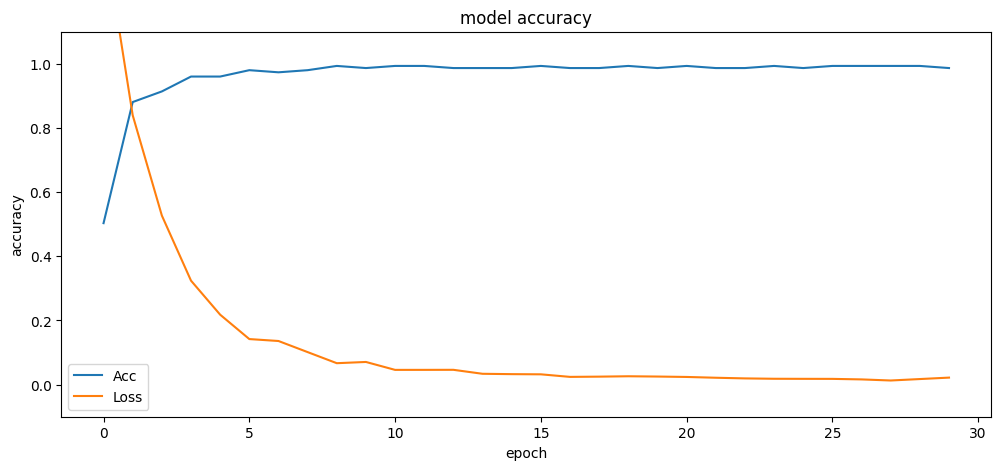

In [ ]:
# Graficar el modelo N1
Grafica_Modelo(history_N1)

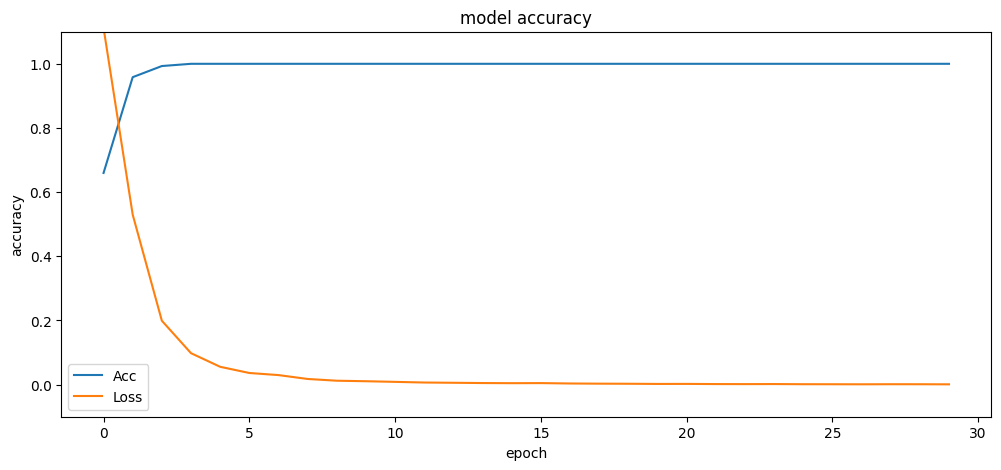

In [ ]:
# Graficar el modelo N2A
Grafica_Modelo(history_N2A)

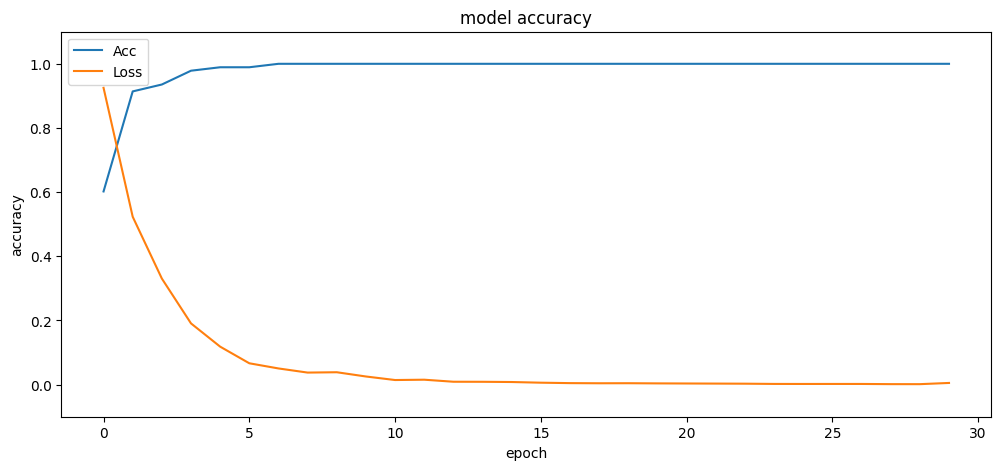

In [ ]:
# Graficar el modelo N2B
Grafica_Modelo(history_N2B)

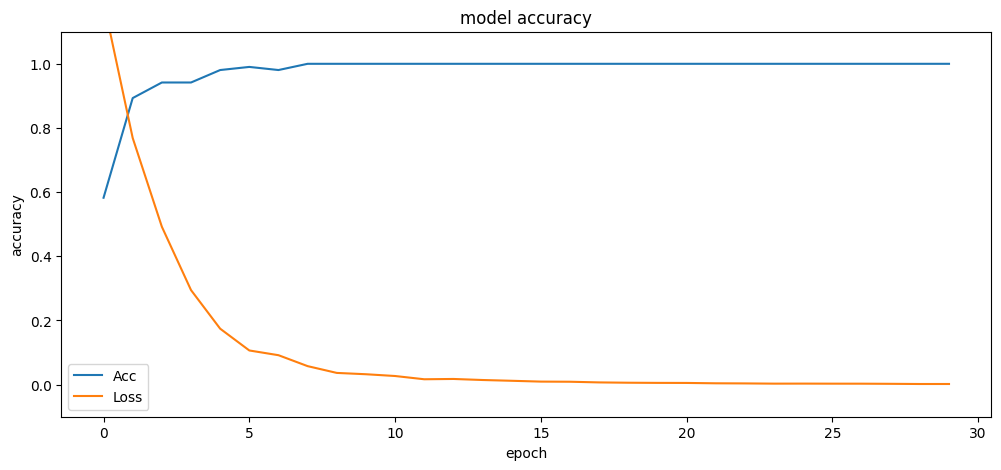

In [ ]:
# Graficar el modelo N2C
Grafica_Modelo(history_N2C)

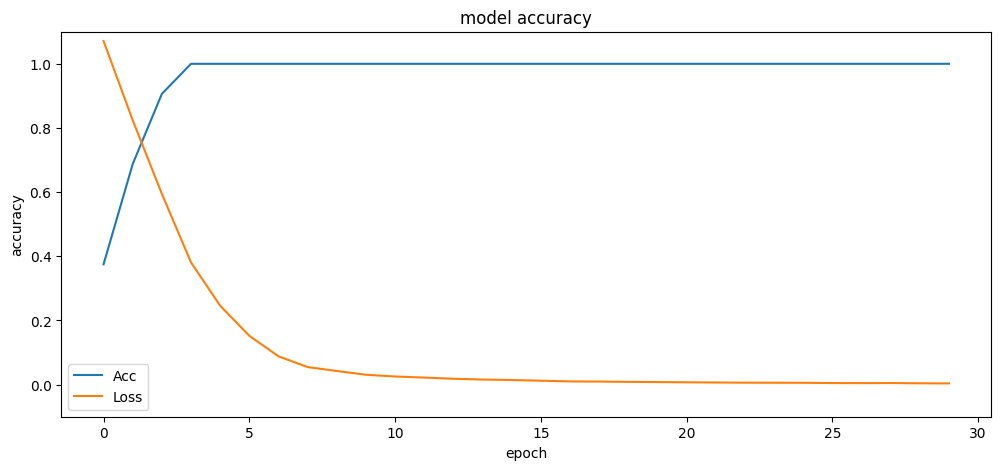

In [ ]:
# Graficar el modelo Carreras
Grafica_Modelo(history_Carrera)

## Programación de Árbol conversacional ##

In [ ]:
# El árbol conversacional debe de estar en un estado específico
# iniciar en el nivel contextual 1, e ir avanzando conforme a
# las decisiones que toma el usuario, como si fuera una máquina
# de estados

def instancer(inp, model, tags, tokenizer):
    inp = inp.lower().replace("á", "a").replace("é", "e").replace("í", "i").replace("ó", "o")
    inp = inp.replace("ú", "u").replace("¿", "").replace("?", "")
    txt = [inp]
    if tokenizer == 1:
        seq = tokenizer_N1.texts_to_sequences(txt)
    elif tokenizer == 2:
        seq = tokenizer_N2A.texts_to_sequences(txt)
    elif tokenizer == 3:
        seq = tokenizer_N2B.texts_to_sequences(txt)
    elif tokenizer == 4:
        seq = tokenizer_N2C.texts_to_sequences(txt)
    elif tokenizer == 5:
        seq = tokenizer_Carrera.texts_to_sequences(txt)
    padded = pad_sequences(seq, maxlen=maxlen)
    results = model.predict(padded)
    results_index = numpy.argmax(results)
    tag = list(tags.keys())[results_index]
    maxscore = numpy.max(results)
    return tag, maxscore

In [ ]:
gramatica = {
    "hola":"Hola Pantera Rawr&¿En que te puedo ayudar?",
    "adios": "Fue un gusto ayudarte, hasta luego.&¿En que te puedo ayudar?",
    "bye": "Fue un gusto ayudarte, hasta luego.&¿En que te puedo ayudar?",
    "dime un chiste": "¿Que le dijo una pantera a otra? UPs&¿En que te puedo ayudar?",
    "que sabes hacer": "Muchas cosas wuuuu&¿En que te puedo ayudar?",
    "pantera": "No cualquiera&¿En que te puedo ayudar?",
    "que opinas de upsite": "es un asco&¿En que te puedo ayudar?"
}


precios = {
  "documentos":{
    "constancia":100,
    "titulo":5000,
    "credencial":250,
    "matricula":4000
  },
  "semestre":120000,
  "creditos":3433
}

profesores = {
  "ingenieria": {
    "Programacion 101": {
      "Barbarillo": 0.7,
      "María": 0.6
    },
    "Calculo 101": {
      "Daco": 0.4,
      "Ana": 0.8
    },
    "Fisica 101": {
      "German": 0.2,
      "Pedro": 0.5
    },
    "Programacion 202": {
      "Viki Nicole": 1.0,
      "Hugo": 0.8
    },
    "Calculo 202": {
      "Guillen": 0.9,
      "Andrés": 0.1
    },
    "Fisica 202": {
      "El mago": 0.7,
      "Isabel": 0.2
    }
  },
  "empresariales": {
    "Enconomia 101": {
      "Elena": 0.2,
      "Alejandro": 0.7
    },
    "Contaduria 101": {
      "Javier": 0.9,
      "Lucía": 0.5
    },
    "Costos 101": {
      "Olga": 0.1,
      "Miguel": 0.3
    },
    "Enconomia 202": {
      "Paula": 0.6,
      "Simón": 0.4
    },
    "Contaduria 202": {
      "Rosa": 0.8,
      "José": 0.2
    },
    "Costos 202": {
      "Teresa": 0.9,
      "Víctor": 0.5
    }
  },
  "ciencia_salud": {
    "Biologia 101": {
      "Marcela": 0.6,
      "Raúl": 0.8
    },
    "Farmalogía 101": {
      "Carmen": 0.7,
      "Felipe": 0.2
    },
    "Neurología 101": {
      "Gloria": 0.1,
      "Héctor": 0.3
    },
    "Biologia 202": {
      "Natalia": 0.4,
      "Roberto": 0.9
    },
    "Farmalogía 202": {
      "Inés": 0.7,
      "Manuel": 0.5
    },
    "Neurología 202": {
      "Sara": 0.2,
      "Carlos": 0.6
    }
  }
}

materias = {
  "ingenieria": {
    "ene_ago": {
      "Programacion 101": "Lunes 10-12",
      "Calculo 101": "Martes 11-13",
      "Fisica 101": "Miercoles 12-14"
    },
    "ago_dic": {
      "Programacion 202": "Martes 8-10",
      "Calculo 202": "Miercoles 10-12",
      "Fisica 202": "Lunes 14-16"
    },
    "optativas": {
      "Arte digital": "Viernes 20-22",
      "Electronica": "Lunes 7-9",
      "Diseño Logico": "Miercoles 17-19"
    },
    "dificiles":{
      "Calculo 202":"7/70",
      "Fisica 202": "12/10",
      "Programacion 101": "6/10"
    }
  },
  "empresariales": {
    "ene_ago": {
      "Enconomia 101": "Martes 10-12",
      "Contaduria 101": "Lunes 5-6",
      "Costos 101": "Lunes 10-12"
    },
    "ago_dic": {
      "Enconomia 202": "Viernes 10-12",
      "Contaduria 202": "Jueves 10-12",
      "Costos 202": "Martes 10-12"
    },
    "optativas": {
      "Filosofia del arte": "Viernes 20-22",
      "Eneología": "Lunes 7-9",
      "Marketing Digital": "Miercoles 17-19"
    },
    "dificiles":{
      "Costos 101":"7/70",
      "Costos 202": "12/10",
      "Contaduria 202": "6/10"
    }
  },
  "ciencia_salud": {
    "ene_ago": {
      "Biologia 101": "Lunes 10-12",
      "Farmalogía 101": "Viernes 10-12",
      "Neurología 101": "Miercoles 10-12"
    },
    "ago_dic": {
      "Biologia 202": "Jueves 10-12",
      "Farmacología 202": "Miercoles 10-12",
      "Neurología 202": "Lunes 10-12"
    },
      "optativas":{
        "Etica de la salud":"Viernes 20-22",
        "Direccion de hospitales":"Lunes 7-9",
        "Primero Auxilios":"Miercoles 17-19"
      },
    "dificiles":{
      "Neurologia 202":"7/70",
      "Farmacologia 101": "12/10",
      "Biologia 101": "6/10"
    }
  }
}

fechas = {
  "asuetos": {
    "ene_ago": "Los días de asueto para el semestre de primavera: 01/01, 05/02, 21/03, 01/05",
    "ago_dic": "Los días de asueto para el semestre de invierno: 16/09, 12/10, 02/11, 12/12"
  },
  "examenes": {
    "ene_ago": "Las fechas de examenes para el semestre de primavera son: \n Primer parcial: 20/02-7/03 \n Segundo Parcial: 10/04-24/04 \n Tercer Parcial: 16/05-30/05",
    "ago_dic": "Las fechas de examenes para el semestre de invierno son: \n Primer parcial:20/08-7/09 \n Segundo Parcial: 10/10-24/10 \n Tercer Parcial: 16/11-30/11"
  },
  "vacaciones": {
    "verano":"Las vacaciones de Semena Santa comienzan en: 01/04 - 14/04 y las vacaciones de verano comienzan el: 01/06 - 07/08" ,
    "invierno":"Las vacaciones de Invierno comienzan el: 06/12-07/01"
  },
  "limite_pago":{
    "ene_ago": "Las fechas limite de pago para el semestre de primavera son: 07/01, 03/02, 03/03, 03/04, 03/05",
    "ago_dic": "Las fechas limite de pago para el semestre de invierno son: 07/08, 03/09, 03/10, 03/11, 03/12"
  }
}

In [ ]:
dicc_prompts_estados={
    'N1':('Bienvenido al UPBot, ¿En qué te puedo ayudar?','N1'),
    'N2A':('UPBot: Perfecto ¿Qué fecha importante te gustaria saber?', 'N2A'),
    'N2B' :('UPBot: Perfecto ¿Deseas saber de una carrera en especifica, optativas o las dificiles?', 'N2B'),
    'N2C': ('UPBot: Perfecto ¿Sobre que precios desearias consultar?', 'N2C'),
    'CarreraPlan': ('UPBot: Perfecto ¿Para qué carrera quisieras consultar el plan de estudios ?', 'CarreraPlan'),
    'CarreraHorario': ('UPBot: Perfecto ¿Para que carrera quieres hacer tu horario?', 'CarreraHorario'),
    'RecomiendaProfesor':('Perfecto ¿Para que carrera quieres que te recomiende?', 'RecomiendaProfesor'),
    'N2A1': ('¿Qué semestre estas cursando actualmente?', 'N2A1'),
    'N2A2': ('¿Qué semestre estas cursando actualmente?', 'N2A2'),
    'N2A3': ('¿Qué semestre estas cursando actualmente?', 'N2A3'),
    'N2A4': ('¿Qué semestre estas cursando actualmente?', 'N2A4'),
    'N2B1': ('¿Qué carrera esatas cursando actualmente?', 'N2B1'),
    'N2B2': ('¿Qué carrera esatas cursando actualmente?', 'N2B2'),
    'N2B3': ('¿Qué carrera esatas cursando actualmente?', 'N2B3'),
    'N2C1': ('El precio de la matricula es:' + str(precios["documentos"]["matricula"]) + '&  ¿Desea volver al menu principal o salir ?', 'N2C1'),
    'N2C2': ('El precio del crédito este semestre esta en:' + str(precios["creditos"]) + '&  ¿Desea volver al menu principal o salir ?', 'N2C2'),
    'N2C3': ('¿Sobre qué tipo de documento desea consultar precios:?', 'N2C3'),
    'N2C4': ('El precio del semestre en total seria de:' + str(precios["semestre"]), 'N2C4'),
    'CarreraPlan1': ('El plan de estudio ideal para ingenieria es:', 'CarreraPlan1'),
    'CarreraPlan2': ('El plan de estudio ideal para empresariales es:', 'CarreraPlan2'),
    'CarreraPlan3': ('El plan de estudio ideal para Ciencias de la Salud es:', 'CarreraPlan3'),
    'CarreraHorario1': ('¿Qué semestre vas a cursar?', 'CarreraHorario1'),
    'CarreraHorario2': ('¿Qué semestre vas a cursar?', 'CarreraHorario2'),
    'CarreraHorario3': ('¿Qué semestre vas a cursar?', 'CarreraHorario3'),
    'RecomiendaProfesor1': ('Los profesores recomendados para Ingenieria', 'RecomiendaProfesor1'),
    'RecomiendaProfesor2': ('Los profesores recomendados para Empresariales', 'RecomiendaProfesor2'),
    'RecomiendaProfesor3': ('Los profesores recomendados para Ciencias de la Salud', 'RecomiendaProfesor3'),
    'AsuetosPrimavera': ('Muy bien, los asuetos para primavera son:' + (fechas["asuetos"]["ene_ago"]), 'N2A'),
    'AsuetosInvierno': ('Muy bien, los asuetos para invierno son:' + (fechas["asuetos"]["ago_dic"]), 'N2A'),
    'ExamenesPrimavera': (' Muy bien, los examenes para primavera son:' + (fechas["examenes"]["ene_ago"]), 'N2A'),
    'ExamenesInvierno': (' Muy bien, los examenes para invierno son:' + (fechas["examenes"]["ago_dic"]), 'N2A'),
    'VacacionesPrimavera': (' Muy bien, las vacaciones para primavera son:' + (fechas["vacaciones"]["verano"]), 'N2A'),
    'VacacionesInvierno': (' Muy bien, las vacaciones para invierno son:' + (fechas["vacaciones"]["invierno"]),'N2A'),
    'FechaPagoPrimavera': (' Muy bien, las fechas limite de pago para primavera son:' + (fechas["limite_pago"]["ene_ago"]), 'N2A'),
    'FechaPagoInvierno': (' Muy bien, las fechas limite de pago para invierno son:' + (fechas["limite_pago"]["ago_dic"]), 'N2A'),
    'AsuetosPrimavera1': ('Muy bien, los asuetos para primavera son:' + (fechas["asuetos"]["ene_ago"]), 'N2A1'),
    'AsuetosInvierno1': ('Muy bien, los asuetos para invierno son:' + (fechas["asuetos"]["ago_dic"]), 'N2A1'),
    'ExamenesPrimavera2': (' Muy bien, los examenes para primavera son:' + (fechas["examenes"]["ene_ago"]), 'N2A2'),
    'ExamenesInvierno2': (' Muy bien, los examenes para invierno son:' + (fechas["examenes"]["ago_dic"]), 'N2A2'),
    'VacacionesPrimavera3': (' Muy bien, las vacaciones para primavera son:' + (fechas["vacaciones"]["verano"]), 'N2A3'),
    'VacacionesInvierno3': (' Muy bien, las vacaciones para invierno son:' + (fechas["vacaciones"]["invierno"]),'N2A3'),
    'FechaPagoPrimavera4': (' Muy bien, las fechas limite de pago para primavera son:' + (fechas["limite_pago"]["ene_ago"]), 'N2A4'),
    'FechaPagoInvierno4': (' Muy bien, las fechas limite de pago para invierno son:' + (fechas["limite_pago"]["ago_dic"]), 'N2A4'),
    'N2B11': ('Para que semestre estas interesado', 'N2B11'),
    'N2B12': ('Para que semestre estas interesado', 'N2B12'),
    'N2B13': ('Para que semestre estas interesado', 'N2B13'),
    #FOR
    #N2B1
    'IngePrimavera1':('Muy bien, las materias disponibles para primavera en ingenieria seria:', 'N2B1'),
    'IngeInvierno1':('Muy bien, las materias disponibles para invierno en ingenieria seria:', 'N2B1'),
    'EmprePrimavera1':('Muy bien, las materias disponibles para primavera en empresariales seria:', 'N2B1'),
    'EmpreInvierno1':('Muy bien, las materias disponibles para invierno en empresariales seria:', 'N2B1'),
    'CienPrimavera1':('Muy bien, las materias disponibles para primavera en ciencias de la salud seria:', 'N2B1'),
    'CienInvierno1':('Muy bien, las materias disponibles para invierno en ciencias de la  salud seria:', 'N2B1'),
    #N2B2
    'IngeOpt2':('Muy bien, Las materias optativas para ingenieria son:', 'N2B2'),
    'EmpreOpt2':('Muy bien, Las materias optativas para empresariales son:', 'N2B2'),
    'CienOpt2':('Muy bien, Las materias optativas para ciencias de la salud son:', 'N2B2'),
    #N2B3
    'IngeOpt3':('Muy bien, Las materias con dificultad alta para ingenieria son:', 'N2B3'),
    'EmpreOpt3':('Muy bien, Las materias con dificultad alta para empresariales son:', 'N2B3'),
    'CienOpt3':('Muy bien, Las materias con dificultad alta para ciencia de la salud son:', 'N2B3'),
    #Plan1
    #Plan1
    #Plan1
    #Horario1
    'IngeHPrimavera': (' Muy bien, tu horario para el semestre de primavera seria:', 'CarreraHorario1'),
    #Horario2
    'EmpreHPrimavera': (' Muy bien, tu horario para el semestre de primavera seria:', 'CarreraHorario2'),
    #Horario3
    'EmpreHPrimavera': (' Muy bien, tu horario para el semestre de primavera seria:', 'CarreraHorario3'),
    #RecomendarProfes1
    'RecomiendaProf1' :('Los profesores recomendados para Ingenieria ', 'RecomiendaProfesor1'),
    #RecomendarProfes2
    'RecomiendaProf2' :('Los profesores recomendados para Empresariales ', 'RecomiendaProfesor2'),
    #RecomendarProfes1
    'RecomiendaProf3' :('Los profesores recomendados para Ciencias de la Salud ', 'RecomiendaProfesor3'),
    #No entendi
    'No entendi N1':("Lo siento, pero no entendí tu petición, ¿Podrías decirlo de otra forma?",'N1'),
    'No entendi N2A' : ('Lo siento, pero no entendí ¿Qué fecha importante te gustaria saber?', 'N2A'),
    'No entendi N2B': ('Lo siento, pero no entendí ¿Sobre qué tipo de materias quieres consultar?', 'N2B'),
    'No entendi N2C': ('Lo siento, pero no entendí ¿Sobre que precios desearias consultar?', 'N2C'),
    'No entendi CP': ('Lo siento, pero no entendí ¿Me puedes repetir para que carrera?', 'CarreraPlan'),
    'No entendi CH': ('Lo siento, pero no entendí ¿Me puedes repetir para que carrera?', 'CarreraHorario'),
    'No entendi RP': ('', 'RecomiendaProfesor'),
    'No entendi N2A1':('¿Podrías repetirme el semestre en el que te encuentras?', 'N2A1'),
    'No entendi N2A2':('¿Podrías repetirme el semestre en el que te encuentras?', 'N2A2'),
    'No entendi N2A3':('¿Podrías repetirme el semestre en el que te encuentras?', 'N2A3'),
    'No entendi N2A4':('¿Podrías repetirme el semestre en el que te encuentras?', 'N2A4'),
    'No entendi N2B1':('Lo siento, pero no entendí ¿Me puedes repetir para que carrera?', 'N2B1'),
    'No entendi N2B2':('Lo siento, pero no entendí ¿Me puedes repetir para que carrera?', 'N2B2'),
    'No entendi N2B3':('Lo siento, pero no entendí ¿Me puedes repetir para que carrera?', 'N2B3'),
    'No entendi N2C1':('Lo siento, pero no entendí ¿Me puedes repetir para que carrera?', 'N2C1'),
    'No entendi N2C2':('Lo siento, pero no entendí ¿Me puedes repetir para que carrera?', 'N2C2'),
    'No entendi N2C3':('¿Podrías repetrime sobre que tipo de documento deseas consultar precios?', 'N2C3'),
    'No entendi N2C4':('Lo siento, pero no entendí ¿Me puedes repetir para que carrera?', 'N2C4'),
    'No entendi CP1': ('Lo siento, pero no entendí ¿Me puedes repetir para que carrera?', 'CarreraPlan1'),
    'No entendi CP2': ('Lo siento, pero no entendí ¿Me puedes repetir para que carrera?', 'CarreraPlan2'),
    'No entendi CP3': ('Lo siento, pero no entendí ¿Me puedes repetir para que carrera?', 'CarreraPlan3'),
    'No entendi CH1': ('¿Podrías repetirme el semestre en el que te encuentras?', 'CarreraHorario1'),
    'No entendi CH2': ('¿Podrías repetirme el semestre en el que te encuentras?', 'CarreraHorario2'),
    'No entendi CH3': ('¿Podrías repetirme el semestre en el que te encuentras?', 'CarreraHorario3'),
    'No entendi RP1': ('Lo siento, pero no entendí ¿Me puedes repetir para que carrera?', 'RecomiendaProfesor1'),
    'No entendi RP2': ('Lo siento, pero no entendí ¿Me puedes repetir para que carrera?', 'RecomiendaProfesor2'),
    'No entendi RP3': ('Lo siento, pero no entendí ¿Me puedes repetir para que carrera?', 'RecomiendaProfesor3'),
    'No entendi N2B11':('¿Podrías repetirme el semestre en el que te encuentras?', 'N2B11'),
    'No entendi N2B12':('¿Podrías repetirme el semestre en el que te encuentras?', 'N2B12'),
    'No entendi N2B13':('¿Podrías repetirme el semestre en el que te encuentras?', 'N2B13'),
    'salir':('Hasta luego, fue un gusto hablar contigo', '0')
}

In [ ]:
# Función del Nivel contextual 1:
def Activar_N1(text):
    # Pregunta inicial cuando se ingresa en el nivel contextual NI

    inp = text

    tag, maxscore = instancer(inp, model_N1, N1,1)
    if maxscore > 0.5 or inp == 'salir':
        pass
    else:
        return dicc_prompts_estados['No entendi N1']

    if inp == 'salir':
        return dicc_prompts_estados['salir']


    if tag == 'Fechas importantes':
        if inp.count('asueto') > 0:
            return dicc_prompts_estados['N2A1']
        elif inp.count('examen') > 0:
            return dicc_prompts_estados['N2A2']
        elif inp.count('vacaciones') > 0:
            return dicc_prompts_estados['N2A3']
        elif inp.count('pago')>0:
            return dicc_prompts_estados['N2A4']
        else:
            return dicc_prompts_estados['N2A']

    if tag == 'Materias disponibles':
        if inp.count('especifica') > 0:
            return dicc_prompts_estados['N2B1']
        elif inp.count('optativa') > 0:
            return dicc_prompts_estados['N2B2']
        elif inp.count('dificil') > 0:
            return dicc_prompts_estados['N2B3']
        else:
            return dicc_prompts_estados['N2B']

    if tag == 'Precios':
        if inp.count('matricula') > 0:
            return dicc_prompts_estados['N2C1']
        elif inp.count('credito') > 0:
            return dicc_prompts_estados['N2C2']
        elif inp.count('documento') > 0:
            return dicc_prompts_estados['N2C3']
        elif inp.count('semestre') > 0:
            return dicc_prompts_estados['N2C4']
        else:
            return dicc_prompts_estados['N2C']

    if tag == 'Plan de estudios':
        if inp.count('ingenieria') > 0:
            return dicc_prompts_estados['CarreraPlan1']
        elif inp.count('empresarial') > 0:
            return dicc_prompts_estados['CarreraPlan2']
        elif inp.count('medicina') + inp.count('enfermeria') + inp.count('psicologia') > 0:
            return dicc_prompts_estados['CarreraPlan3']
        else:
            return dicc_prompts_estados['CarreraPlan']

    if tag == 'Horario':
        if inp.count('ingenieria') > 0:
            return dicc_prompts_estados['CarreraHorario1']
        elif inp.count('empresarial') > 0:
            return dicc_prompts_estados['CarreraHorario2']
        elif inp.count('medicina') + inp.count('enfermeria') + inp.count('psicologia') > 0:
            return dicc_prompts_estados['CarreraHorario3']
        else:
            return dicc_prompts_estados['CarreraHorario']

    if tag == 'Recomienda profesores':
        if inp.count('ingenieria') > 0:
            return dicc_prompts_estados['RecomiendaProfesor1']
        elif inp.count('empresarial') > 0:
            return dicc_prompts_estados['RecomiendaProfesor2']
        elif inp.count('medicina') + inp.count('enfermeria') + inp.count('psicologia') > 0:
            return dicc_prompts_estados['RecomiendaProfesor3']
        else:
            return dicc_prompts_estados['RecomiendaProfesor']


In [ ]:
# Función del Nivel contextual 2A:
def Activar_N2A(text):
    # Pregunta inicial cuando se ingresa en el nivel contextual NIIA

    inp = text
    tag, maxscore = instancer(inp, model_N2A, N2A,2)

    if maxscore > 0.5 or inp == 'salir' or inp == 'volver':
        pass
    else:
        return dicc_prompts_estados['No entendi N2A']

    if inp == 'volver':
        return dicc_prompts_estados['N1']

    if inp == 'salir':
        return dicc_prompts_estados['salir']

    if tag == 'Asuetos':
        if inp.count('ene') + inp.count('enero') + inp.count('primavera') + inp.count('ene-ago') > 0:
            return dicc_prompts_estados['AsuetosPrimavera']
        elif inp.count('ago') + inp.count('agosto') + inp.count('invierno') + inp.count('ago-dic') > 0:
            return dicc_prompts_estados['AsuetosInvierno']

        return dicc_prompts_estados['N2A1']

    if tag == 'Examenes':
        if inp.count('ene') + inp.count('enero') + inp.count('primavera') + inp.count('ene-ago') > 0:
            return dicc_prompts_estados['ExamenesPrimavera']
        elif inp.count('ago') + inp.count('agosto') + inp.count('invierno') + inp.count('ago-dic') > 0:
            return dicc_prompts_estados['ExamenesInvierno']
        return dicc_prompts_estados['N2A2']

    if tag == 'Vacaciones':
        if inp.count('ene') + inp.count('enero') + inp.count('primavera') + inp.count('ene-jul') > 0:
            return dicc_prompts_estados['VacacionesPrimavera']
        elif inp.count('ago') + inp.count('agosto') + inp.count('invierno') + inp.count('ago-dic') > 0:
            return dicc_prompts_estados['VacacionesInvierno']
        return dicc_prompts_estados['N2A3']

    if tag == 'Pagos':
        if inp.count('ene') + inp.count('enero') + inp.count('primavera') + inp.count('ene-ago') > 0:
            return dicc_prompts_estados['FechaPagoPrimavera']
        elif inp.count('ago') + inp.count('agosto') + inp.count('invierno') + inp.count('ago-dic') > 0:
            return dicc_prompts_estados['FechaPagoInvierno']
        return dicc_prompts_estados['N2A4']

In [ ]:
def Activar_N2B(text):
    # Pregunta inicial cuando se ingresa en el nivel contextual NIIA

    inp = text
    tag, maxscore = instancer(inp, model_N2B, N2B,3)

    if maxscore > 0.5 or inp == 'salir' or inp == 'volver':
        pass
    else:
        return dicc_prompts_estados['No entendi N2B']

    if inp == 'volver':
        return dicc_prompts_estados['N1']

    if inp == 'salir':
        return dicc_prompts_estados['salir']

    if tag == 'Carrera_especifica':
        return dicc_prompts_estados['N2B1']
        #if inp.count('ingenieria') > 0:
            #return 'Carrera1MateriasSemestre'
        #elif inp.count('empresarial') > 0 or inp.count('admin') > 0:
            #return 'Carrera2MateriasSemestre'
        #elif inp.count('medic') > 0 or inp.count('enfermeria') > 0:
            #return 'Carrera3MateriasSemestre'
        #else:
            #return 'N2B1'

    if tag == 'Materias_optativas':
        return dicc_prompts_estados['N2B2']

    if tag == 'Materias_dificiles':
        return dicc_prompts_estados['N2B3']
        #if inp.count('ingenieria') > 0:
         #   return 'Carrera1MateriasSemestre'
        #elif inp.count('empresarial') > 0 or inp.count('admin') > 0:
          #  return 'Carrera2MateriasSemestre'
        #elif inp.count('medic') > 0 or inp.count('enfermeria') > 0:
           # return 'Carrera3MateriasSemestre'
        #else:
            #return 'N2B1'

In [ ]:
# Función del Nivel contextual 2C:
def Activar_N2C(text):
    # Pregunta inicial cuando se ingresa en el nivel contextual NIIA

    inp = text
    tag, maxscore = instancer(inp, model_N2C, N2C,4)

    if maxscore > 0.5 or inp == 'salir' or inp == 'volver':
        pass
    else:
        return dicc_prompts_estados['No entendi N2C']

    if inp == 'volver':
        return dicc_prompts_estados['N1']

    if inp == 'salir':
        return dicc_prompts_estados['salir']

    if tag == 'Matrícula':
        return dicc_prompts_estados['N2C1']

    if tag == 'Créditos':
        return dicc_prompts_estados['N2C2']

    if tag == 'Documento':
        return dicc_prompts_estados['N2C3']

    if tag == 'Semestre' :
        return dicc_prompts_estados['N2C4']


In [ ]:
# Función del Nivel contextual Carreras:
def Activar_CarreraPlan(text):
    # Pregunta inicial cuando se ingresa en el nivel contextual NIIA

    inp = text
    tag, maxscore = instancer(inp, model_Carrera, Carrera,5)

    if maxscore > 0.5 or inp == 'salir' or inp == 'volver':
        pass
    else:
        return dicc_prompts_estados['No entendi CP']

    if inp == 'volver':
        return 'N1'

    if inp == 'salir':
        return dicc_prompts_estados['salir']

    if tag == 'ingenieria':
        plan1 = "El plan de estudio ideal para ingenieria es: "
        for key, value in profesores["ingenieria"].items():
            plan1 += "\n"
            plan1 += (f'Materia:{key}')
        plan1 += "& ¿Desea volver al menu principal o salir?"
        return plan1, 'CarreraPlan1'
        #return dicc_prompts_estados['CarreraPlan1']

    if tag == 'empresarial':
        plan2 = "El plan de estudio ideal para empresariales es: "
        for key, value in profesores["empresariales"].items():
            plan2 += "\n"
            plan2 += (f'Materia:{key}')
        plan2 += "& ¿Desea volver al menu principal o salir?"
        return plan2, 'CarreraPlan2'
        #return dicc_prompts_estados['CarreraPlan2']

    if tag == 'ciencia_salud':
        plan3 = "El plan de estudio ideal para ciencias de la salud es: "
        for key, value in profesores["ciencia_salud"].items():
            plan3 += "\n"
            plan3 += (f'Materia:{key}')
        plan3 += "& ¿Desea volver al menu principal o salir?"
        return plan3, 'CarreraPlan3'
        #return dicc_prompts_estados['CarreraPlan3']


In [ ]:
# Función del Nivel contextual Carreras:
def Activar_CarreraHorario(text):
    # Pregunta inicial cuando se ingresa en el nivel contextual NIIA

    inp = text
    tag, maxscore = instancer(inp, model_Carrera, Carrera,5)

    if maxscore > 0.5 or inp == 'salir' or inp == 'volver':
        pass
    else:
        return dicc_prompts_estados['No entendi CH']

    if inp == 'volver':
        return 'N1'

    if inp == 'salir':
        return dicc_prompts_estados['salir']

    if tag == 'ingenieria':
        return dicc_prompts_estados['CarreraHorario1']

    if tag == 'empresarial':
        return dicc_prompts_estados['CarreraHorario2']

    if tag == 'ciencia_salud':
        return dicc_prompts_estados['CarreraHorario3']

In [ ]:
# Función del Nivel contextual Carreras:
def Activar_RecomiendaProfesor(text):
    # Pregunta inicial cuando se ingresa en el nivel contextual NIIA

    inp = text
    tag, maxscore = instancer(inp, model_Carrera, Carrera,5)

    if maxscore > 0.5 or inp == 'salir' or inp == 'volver':
        pass
    else:
        return dicc_prompts_estados['No entendi RP']
    if inp == 'volver':
        return 'N1'

    if inp == 'salir':
        return dicc_prompts_estados['salir']

    if tag == 'ingenieria':
        recomienda1 = "\nUPBot: Los profesores recomendados para Ingenieria : "
        for key, value in profesores["ingenieria"].items():
            recomienda1 += "\n"
            recomienda1 += (f'Materia:{key}')
            for key1, value1 in value.items():
                recomienda1 += "\n"
                recomienda1 += (f'El profesor: {key1}, tiene un score de: {value1}')

        recomienda1 += "& ¿Desea volver al menu principal o salir ?\n"
        return recomienda1, 'RecomiendaProfesor1'
        #return dicc_prompts_estados['RecomiendaProfesor1']

    if tag == 'empresarial':
        recomienda2 = "\nUPBot: Los profesores recomendados para Empresariales : "
        for key, value in profesores["empresariales"].items():
            recomienda2 += "\n"
            recomienda2 += (f'Materia:{key}')
            for key1, value1 in value.items():
                recomienda2 += "\n"
                recomienda2 += (f'El profesor: {key1}, tiene un score de: {value1}')

        recomienda2 += "& ¿Desea volver al menu principal o salir ?\n"
        return recomienda2, 'RecomiendaProfesor2'
        #return dicc_prompts_estados['RecomiendaProfesor2']

    if tag == 'ciencia_salud':
        recomienda3 = "\nUPBot: Los profesores recomendados para Ciencias de la Salud : "
        for key, value in profesores["ciencia_salud"].items():
            recomienda3 += "\n"
            recomienda3 += (f'Materia:{key}')
            for key1, value1 in value.items():
                recomienda3 += "\n"
                recomienda3 += (f'El profesor: {key1}, tiene un score de: {value1}')

        recomienda3 += "& ¿Desea volver al menu principal o salir ?\n"
        return recomienda3, 'RecomiendaProfesor3'
        #return dicc_prompts_estados['RecomiendaProfesor3']

In [ ]:
# Función del Nivel contextual 2A1:
def Activar_N2A1(text):
    # Pregunta inicial cuando se ingresa en el nivel contextual NIIA1
    inp = text

    if inp == 'volver':
        return dicc_prompts_estados['N1']
    elif inp == 'salir':
        return dicc_prompts_estados['salir']
    elif inp.count('ene') + inp.count('enero') + inp.count('primavera') + inp.count('ene-ago') > 0:
        return dicc_prompts_estados['AsuetosPrimavera']
    elif inp.count('ago') + inp.count('agosto') + inp.count('invierno') + inp.count('ago-dic') > 0:
        return dicc_prompts_estados['AsuetosInvierno']

    else:
        return dicc_prompts_estados['No entendi N2A1']

In [ ]:
# Función del Nivel contextual 2A2:
def Activar_N2A2(text):
    # Pregunta inicial cuando se ingresa en el nivel contextual NIIA1
    inp = text
    if inp == 'volver':
        return dicc_prompts_estados['N1']
    elif inp == 'salir':
        return dicc_prompts_estados['salir']
    elif inp.count('ene') + inp.count('enero') + inp.count('primavera') + inp.count('ene-ago') > 0:
        return dicc_prompts_estados['ExamenesPrimavera']
    elif inp.count('ago') + inp.count('agosto') + inp.count('invierno') + inp.count('ago-dic') > 0:
        return dicc_prompts_estados['ExamenesInvierno']
    else:
        return dicc_prompts_estados['No entendi N2A2']


In [ ]:
# Función del Nivel contextual 2A3:
def Activar_N2A3(text):
    # Pregunta inicial cuando se ingresa en el nivel contextual NIIA1

    inp = text

    if inp == 'volver':
        return dicc_prompts_estados['N1']
    elif inp == 'salir':
        return dicc_prompts_estados['salir']
    elif inp.count('ene') + inp.count('enero') + inp.count('primavera') + inp.count('ene-jul') > 0:
        return dicc_prompts_estados['VacacionesPrimavera']
    elif inp.count('ago') + inp.count('agosto') + inp.count('invierno') + inp.count('ago-dic') > 0:
        return dicc_prompts_estados['VacacionesInvierno']
    else:
        return dicc_prompts_estados['No entendi N2A3']

In [ ]:
# Función del Nivel contextual 2A4:
def Activar_N2A4(text):
    # Pregunta inicial cuando se ingresa en el nivel contextual NIIA1
    inp = text

    if inp == 'volver':
        return dicc_prompts_estados['N1']
    elif inp == 'salir':
        return dicc_prompts_estados['salir']
    elif inp.count('ene') + inp.count('enero') + inp.count('primavera') + inp.count('ene-ago') > 0:
        return dicc_prompts_estados['FechaPagoPrimavera']
    elif inp.count('ago') + inp.count('agosto') + inp.count('invierno') + inp.count('ago-dic') > 0:
        return dicc_prompts_estados['FechaPagoInvierno']
    else:
        return dicc_prompts_estados['No entendi N2A4']

In [ ]:
# Función del Nivel contextual 2B1:
def Activar_N2B1(text):
    # Pregunta inicial cuando se ingresa en el nivel contextual NIIA1

    inp = text
    tag, maxscore = instancer(inp, model_Carrera, Carrera,5)

    if maxscore > 0.5 or inp == 'salir' or inp == 'volver':
        pass
    else:
        return dicc_prompts_estados['No entendi N2B1']

    if inp == 'volver':
        return dicc_prompts_estados['N1']

    if inp == 'salir':
        return dicc_prompts_estados['salir']

    if tag == 'ingenieria':
        return dicc_prompts_estados['N2B11']

    if tag == 'empresarial':
      return dicc_prompts_estados['N2B12']

    if tag == 'ciencia_salud':
      return dicc_prompts_estados['N2B13']

In [ ]:
def ingenieria_materias(text):
    inp = text
    if inp == 'volver':
        return dicc_prompts_estados['N2B']
    elif inp == 'salir':
        return dicc_prompts_estados['salir']
    elif inp.count('ene') + inp.count('enero') + inp.count('primavera') + inp.count('ene-ago') > 0:
        ingeb1P = "\nUPBot: Muy bien, las materias disponibles para primavera en ingenieria seria: \n"
        for key, value in materias["ingenieria"]["ene_ago"].items():
            ingeb1P += "\n"
            ingeb1P += (f'Materia:{key}, Horario:{value}')
        return ingeb1P,'N2B'
    elif inp.count('ago') + inp.count('agosto') + inp.count('invierno') + inp.count('ago-dic') > 0:
        ingeb1I ="\nUPBot: Muy bien, las materias disponibles para el semestre de invierno en ingenieria seria: \n"
        for key, value in materias["ingenieria"]["ago_dic"].items():
            ingeb1I += "\n"
            ingeb1I += (f'Materia:{key}, Horario:{value}')
        return ingeb1I, 'N2B'
    else:
        return dicc_prompts_estados['No entendi N2B11']

In [ ]:
def empresarial_materias(text):
    inp = text
    if inp == 'volver':
        return dicc_prompts_estados['N2B']
    elif inp == 'salir':
        return dicc_prompts_estados['salir']
    elif inp.count('ene') + inp.count('enero') + inp.count('primavera') + inp.count('ene-ago') > 0:
        enmpb1P = "\nUPBot: Muy bien, las materias disponibles para primavera en empresariales seria: \n"
        for key, value in materias["empresariales"]["ene_ago"].items():
            enmpb1P += "\n"
            enmpb1P += (f'Materia:{key}, Horario:{value}')
        return enmpb1P,'N2B'
    elif inp.count('ago') + inp.count('agosto') + inp.count('invierno') + inp.count('ago-dic') > 0:
        enmpb1I ="\nUPBot: Muy bien, las materias disponibles para el semestre de invierno en empresariales seria: \n"
        for key, value in materias["empresariales"]["ago_dic"].items():
            enmpb1I += "\n"
            enmpb1I += (f'Materia:{key}, Horario:{value}')
        return enmpb1I, 'N2B'
    else:
        return dicc_prompts_estados['No entendi N2B12']

In [ ]:
def ciencia_materias(text):
    inp = text
    if inp == 'volver':
        return dicc_prompts_estados['N2B']
    elif inp == 'salir':
        return dicc_prompts_estados['salir']
    elif inp.count('ene') + inp.count('enero') + inp.count('primavera') + inp.count('ene-ago') > 0:
        cienb1P = "\nUPBot: Muy bien, las materias disponibles para primavera en ciencias de la salud seria: \n"
        for key, value in materias["ciencia_salud"]["ene_ago"].items():
            cienb1P += "\n"
            cienb1P += (f'Materia:{key}, Horario:{value}')
        return cienb1P,'N2B'
    elif inp.count('ago') + inp.count('agosto') + inp.count('invierno') + inp.count('ago-dic') > 0:
        cienb1I ="\nUPBot: Muy bien, las materias disponibles para el semestre de invierno en ciencias de la salud seria: \n"
        for key, value in materias["ciencia-salud"]["ago_dic"].items():
            cienb1I += "\n"
            cienb1I += (f'Materia:{key}, Horario:{value}')
        return cienb1I, 'N2B'
    else:
        return dicc_prompts_estados['No entendi N2B13']

In [ ]:
# Función del Nivel contextual 2B2:
def Activar_N2B2(text):
    # Pregunta inicial cuando se ingresa en el nivel contextual NIIA1
    inp = text
    tag, maxscore = instancer(inp, model_Carrera, Carrera,5)

    if maxscore > 0.5 or inp == 'salir' or inp == 'volver':
        pass
    else:
        return dicc_prompts_estados['No entendi N2B2']

    if inp == 'volver':
        return dicc_prompts_estados['N1']

    if inp == 'salir':
        return dicc_prompts_estados['salir']

    if tag == 'ingenieria':
        inge2 = "\n UPBot: Las materias optativas para ingenieria son: "
        for key, value in materias["ingenieria"]["optativas"].items():
            inge2 += "\n"
            inge2 += (f'Materia:{key}, Horario:{value}')
        return inge2,'N2B'

    if tag == 'empresarial':
        empre2 = "\n UPBot: Las materias optativas para empresariales son: "
        for key, value in materias["empresariales"]["optativas"].items():
            empre2 += "\n"
            empre2 += (f'Materia:{key}, Horario:{value}')
        return empre2,'N2B'

    if tag == 'ciencia_salud':
        cien2 = "\nUPBot: Las materias optativas para ciencia de la salud son: "
        for key, value in materias["ciencia_salud"]["optativas"].items():
            cien2 += "\n"
            cien2 += (f'Materia:{key}, Horario:{value}')
        return cien2,'N2B'

In [ ]:
# Función del Nivel contextual 2B1:
def Activar_N2B3(text):
    # Pregunta inicial cuando se ingresa en el nivel contextual NIIA1
    inp = text
    tag, maxscore = instancer(inp, model_Carrera, Carrera,5)

    if maxscore > 0.5 or inp == 'salir' or inp == 'volver':
        pass
    else:
        return dicc_prompts_estados['No entendi N2B3']

    if inp == 'volver':
        return dicc_prompts_estados['N1']

    if inp == 'salir':
        return dicc_prompts_estados['salir']

    if tag == 'ingenieria':
        inge3 = "\nUPBot: Las materias con dificultad alta para ingenieria son: "
        for key, value in materias["ingenieria"]["dificiles"].items():
            inge3 += "\n"
            inge3 += (f'Materia:{key}, Nivel de dificultad:{value}')
        return inge3, 'N2B'

    if tag == 'empresarial':
        empre3 = "\nUPBot: Las materias con dificultad alta para empresariales son: "
        for key, value in materias["empresariales"]["dificiles"].items():
            empre3 += "\n"
            empre3 += (f'Materia:{key}, Nivel de dificultad:{value}')
        return empre3, 'N2B'

    if tag == 'ciencia_salud':
        cien3 ="\nUPBot: Las materias con dificultad alta para ciencias de la salud son: "
        for key, value in materias["ciencia_salud"]["dificiles"].items():
            cien3 += "\n"
            cien3 += (f'Materia:{key}, Nivel de dificultad:{value}')
        return cien3, 'N2B'



In [ ]:
# Función del Nivel contextual 2C1:
def Activar_N2C1(text):#regresa respuesta de matricula
    inp = text
    if inp.count('volver') > 0:
        return dicc_prompts_estados['N2C']

    if inp.count('salir') > 0:
        return dicc_prompts_estados['salir']

    return dicc_prompts_estados['No entendi N2C1']

In [ ]:
# Función del Nivel contextual 2C2:
def Activar_N2C2(text):#regresa respuesta de creditos
    inp = input("     Tú: ")
    if inp.count('volver') > 0:
        return dicc_prompts_estados['N2C']

    if inp.count('salir') > 0:
        return dicc_prompts_estados['salir']
    return dicc_prompts_estados['No entendi N2C2']

In [ ]:
# Función del Nivel contextual 2C3:
def Activar_N2C3(text):#regresa respuesta de documentos

    inp = text

    if inp == 'volver':
        return dicc_prompts_estados['N1']
    elif inp == 'salir':
        return dicc_prompts_estados['salir']
    elif inp.count('constancia')  > 0:
        constancia = "Muy bien,el costo de una constancia es: " + str(precios["documentos"]["constancia"])
        return constancia, 'N2C'
    elif inp.count('titulo') > 0:
        titulo = "Muy bien, el costo del titulo es de: " + str(precios["documentos"]["titulo"])
        return titulo, 'N2C'
    elif inp.count('credencial') >0:
        credencial = "Muy bien, el costo de una credencial es de: " + str(precios["documentos"]["credencial"])
        return credencial, 'N2C'
    else:
        return dicc_prompts_estados['No entendi N2C3']

In [ ]:
# Función del Nivel contextual 2C4:
def Activar_N2C4(text):#regresa respuesta de semestre
    inp = text
    if inp.count('volver') > 0:
        return dicc_prompts_estados['N1']

    if inp.count('salir') > 0:
        return dicc_prompts_estados['salir']
    return dicc_prompts_estados['No entendi N2C4']

In [ ]:
# Función del Nivel contextual carreraPlan1:
def Activar_CarreraPlan1(text):#regresa respuesta de plan estudios ingenieria

    inp = text

    if inp.count('volver') > 0:
        return dicc_prompts_estados['N1']

    if inp.count('salir') > 0:
        return dicc_prompts_estados['salir']

    return dicc_prompts_estados['No entendi CP1']

In [ ]:
# Función del Nivel contextual carreraPlan2:
def Activar_CarreraPlan2(text):#regresa respuesta de plan estudios empresarial
    inp = text

    if inp.count('volver') > 0:
        return dicc_prompts_estados['N1']

    if inp.count('salir') > 0:
        return dicc_prompts_estados['salir']

    return dicc_prompts_estados['No entendi CP2']

In [ ]:
# Función del Nivel contextual carreraPlan3:
def Activar_CarreraPlan3(text):#regresa respuesta de plan estudios ciencia Salud
    inp = text

    if inp.count('volver') > 0:
        return dicc_prompts_estados['N1']

    if inp.count('salir') > 0:
        return dicc_prompts_estados['salir']

    return dicc_prompts_estados['No entendi CP3']

In [ ]:
# Función del Nivel contextual CarreraHorario1:
def Activar_CarreraHorario1(text):#regresa respuesta de horario ingenieria
    inp = text

    if inp == 'volver':
        return dicc_prompts_estados['N1']
    elif inp == 'salir':
        return dicc_prompts_estados['salir']
    elif inp.count('ene') + inp.count('enero') + inp.count('primavera') + inp.count('ene-ago') > 0:
        horario1P = "Muy bien, tu horario para el semestre de primavera seria: \n"
        for key, value in materias["ingenieria"]["ene_ago"].items():
            horario1P += "\n"
            horario1P += (f'Materia:{key}, Horario:{value}')
        return horario1P, 'CarreraHorario'
    elif inp.count('ago') + inp.count('agosto') + inp.count('invierno') + inp.count('ago-dic') > 0:
        horario1I = "\nUPBot: Muy bien, tu horario para el semestre de invierno seria: \n"
        for key, value in materias["ingenieria"]["ago_dic"].items():
            horario1I += "\n"
            horario1I += (f'Materia:{key}, Horario:{value}')
        return horario1I, 'CarreraHorario'
    else:
        return dicc_prompts_estados['No entendi CH1']

In [ ]:
# Función del Nivel contextual CarreraHorario2:
def Activar_CarreraHorario2(text):#regresa respuesta de horario empresarial
    inp = text

    if inp == 'volver':
        return dicc_prompts_estados['N1']
    elif inp == 'salir':
        return dicc_prompts_estados['salir']
    elif inp.count('ene') + inp.count('enero') + inp.count('primavera') + inp.count('ene-ago') > 0:
        horario2P = "\nUPBot: Muy bien, tu horario para el semestre de primavera seria: \n"
        for key, value in materias["empresariales"]["ene_ago"].items():
            horario2P += "\n"
            horario2P += (f'Materia:{key}, Horario:{value}')
        return horario2P, 'CarreraHorario'
    elif inp.count('ago') + inp.count('agosto') + inp.count('invierno') + inp.count('ago-dic') > 0:
        horario2I = "\nUPBot: Muy bien, tu horario para el semestre de invierno seria: \n"
        for key, value in materias["empresariales"]["ago_dic"].items():
            horario2I += "\n"
            horario2I += (f'Materia:{key}, Horario:{value}')
        return horario2I, 'CarreraHorario'
    else:
        return dicc_prompts_estados['No entendi CH2']

In [ ]:
# Función del Nivel contextual CarreraHorario3:
def Activar_CarreraHorario3(text):#regresa respuesta de horario ciencia salud

    inp = text

    if inp == 'volver':
        return dicc_prompts_estados['N1']
    elif inp == 'salir':
        return dicc_prompts_estados['salir']
    elif inp.count('ene') + inp.count('enero') + inp.count('primavera') + inp.count('ene-ago') > 0:
        horario3P = "\nUPBot: Muy bien, tu horario para el semestre de primavera seria: \n"
        for key, value in materias["ciencia_salud"]["ene_ago"].items():
            horario3P += "\n"
            horario3P += (f'Materia:{key}, Horario:{value}')
        return horario3P, 'CarreraHorario'
    elif inp.count('ago') + inp.count('agosto') + inp.count('invierno') + inp.count('ago-dic') > 0:
        horario3I = "\nUPBot: Muy bien, tu horario para el semestre de invierno seria: \n"
        for key, value in materias["ciencia_salud"]["ago_dic"].items():
            horario3I += "\n"
            horario3I += (f'Materia:{key}, Horario:{value}')
        return horario3I, 'CarreraHorario'
    else:
        return dicc_prompts_estados['No entendi CH3']

In [ ]:
# Función del Nivel contextual Recomendacion de profesores :
def Activar_RecomiendaProfesor1(text):#regresa respuesta de plan estudios ingenieria
    inp = text
    if inp.count('volver') > 0:
        return dicc_prompts_estados['N1']

    if inp.count('salir') > 0:
        return dicc_prompts_estados['salir']
    return dicc_prompts_estados['No entendi RP1']

In [ ]:
# Función del Nivel contextual Recomendacion de profesores :
def Activar_RecomiendaProfesor2(text):#regresa respuesta de plan estudios ingenieria
    inp = text
    if inp.count('volver') > 0:
        return dicc_prompts_estados['N1']
    if inp.count('salir') > 0:
        return dicc_prompts_estados['salir']
    return dicc_prompts_estados['No entendi RP2']

In [ ]:
# Función del Nivel contextual Recomendacion de profesores :
def Activar_RecomiendaProfesor3(text):#regresa respuesta de plan estudios ingenieria
    inp = text
    if inp.count('volver') > 0:
        return dicc_prompts_estados['N1']

    if inp.count('salir') > 0:
        return dicc_prompts_estados['salir']
    return dicc_prompts_estados['No entendi RP3']

In [ ]:
# Implementación de casos correspondientes para cada nivel del UPBot
# Nivel contextual inicial por defecto, el primero

maquina_estados = {'N1': Activar_N1,
                   'N2A': Activar_N2A,
                   'N2A1': Activar_N2A1,
                   'N2A2': Activar_N2A2,
                   'N2A3': Activar_N2A3,
                   'N2A4': Activar_N2A4,
                   'N2B': Activar_N2B,
                   'N2B1': Activar_N2B1,
                   'N2B2': Activar_N2B2,
                   'N2B3': Activar_N2B3,
                   'N2C': Activar_N2C,
                   'N2C1': Activar_N2C1,
                   'N2C2': Activar_N2C2,
                   'N2C3': Activar_N2C3,
                   'N2C4': Activar_N2C4,
                   'CarreraPlan': Activar_CarreraPlan,
                   'CarreraPlan1': Activar_CarreraPlan1,
                   'CarreraPlan2': Activar_CarreraPlan2,
                   'CarreraPlan3': Activar_CarreraPlan3,
                   'CarreraHorario': Activar_CarreraHorario,
                   'CarreraHorario1': Activar_CarreraHorario1,
                   'CarreraHorario2': Activar_CarreraHorario2,
                   'CarreraHorario3': Activar_CarreraHorario3,
                   'RecomiendaProfesor' : Activar_RecomiendaProfesor,
                   'RecomiendaProfesor1' : Activar_RecomiendaProfesor1,
                   'RecomiendaProfesor2' : Activar_RecomiendaProfesor2,
                   'RecomiendaProfesor3' : Activar_RecomiendaProfesor3,
                   'N2B11' : ingenieria_materias,
                   'N2B12': empresarial_materias,
                   'N2B13' : ciencia_materias
                  }

def chat1(text):
    #Nivel = 'N1'
    if ESTADO_SIG[0] == '0':
      return 'Bienvenido al UPBot, ¿En qué te puedo ayudar?','N1'
    if ESTADO_SIG[0] in maquina_estados:
      return maquina_estados[ESTADO_SIG[0]](text)
    else:
      return "Rempalagos", 'salir'

In [ ]:
!pip install flask-ngrok
!pip install pyngrok

In [ ]:
whatsapp_url_set = 'https://graph.facebook.com/v17.0/170846126103760/messages'
whatsapp_token_set = 'EAAJeJ7Mec0sBO1rWVl4XpAQ142kV3MmefizLSZBKCnGxyzDP7ywFT85TrTIysX6uLTNvAnhzh8mmsDZBA0FQwNPZAzXZADDQMj1ZACNwUuWjR3TwNipayTaGGDKcPLtVSWg1XjEAEymH1n9ZAVPce7qWEcbh7N6LQCxoevzLuoVqkCd8nEF84S3ICWO04fj2R9'
token_set = 'WhatsUP-Bot'

In [ ]:
import requests
import json
import time

def obtener_Mensaje_whatsapp(message):
    if 'type' not in message :
        text = 'mensaje no reconocido'
        return text

    typeMessage = message['type']
    if typeMessage == 'text':
        text = message['text']['body']
    elif typeMessage == 'button':
        text = message['button']['text']
    elif typeMessage == 'interactive' and message['interactive']['type'] == 'list_reply':
        text = message['interactive']['list_reply']['title']
    elif typeMessage == 'interactive' and message['interactive']['type'] == 'button_reply':
        text = message['interactive']['button_reply']['title']
    else:
        text = 'mensaje no procesado'


    return text

def enviar_Mensaje_whatsapp(data):
    try:
        whatsapp_token = whatsapp_token_set
        whatsapp_url = whatsapp_url_set
        headers = {'Content-Type': 'application/json',
                   'Authorization': 'Bearer ' + whatsapp_token}
        print("se envia ", data)
        response = requests.post(whatsapp_url,
                                 headers=headers,
                                 data=data)

        if response.status_code == 200:
            return 'mensaje enviado', 200
        else:
            return 'error al enviar mensaje', response.status_code
    except Exception as e:
        return e,403

def text_Message(number,text):
    data = json.dumps(
            {
                "messaging_product": "whatsapp",
                "recipient_type": "individual",
                "to": number,
                "type": "text",
                "text": {
                    "body": text
                }
            }
    )
    return data


def replyText_Message(number, messageId, text):
    data = json.dumps(
        {
            "messaging_product": "whatsapp",
            "recipient_type": "individual",
            "to": number,
            "context": { "message_id": messageId },
            "type": "text",
            "text": {
                "body": text
            }
        }
    )
    return data

def markRead_Message(messageId):
    data = json.dumps(
        {
            "messaging_product": "whatsapp",
            "status": "read",
            "message_id":  messageId
        }
    )
    return data
ESTADO_SIG= ['0']
def administrar_chatbot(text,number, messageId, name):
    text = text.lower() #mensaje que envio el usuario
    list = []
    print("mensaje del usuario: ",text)

    markRead = markRead_Message(messageId)
    list.append(markRead)
    time.sleep(2)

    if "dibidabadu" in text:
        body = "Loquisimo, si funciona"
        mensaje = text_Message(number,body)
        enviar_Mensaje_whatsapp(mensaje)
    elif "restear" in text:
        ESTADO_SIG[0] = '0'
        body = "Bot Reseteado"
        mensaje = text_Message(number,body)
        enviar_Mensaje_whatsapp(mensaje)
    elif text in gramatica:
        body = gramatica[text]
        responses = body.split('&')
        for re in responses:
          mensaje = text_Message(number,re)
          enviar_Mensaje_whatsapp(mensaje)
        ESTADO_SIG[0] = 'N1'
    else :
        response, next_state = chat1(text)
        responses = response.split('&')
        for re in responses:
          mensaje = text_Message(number,re)
          enviar_Mensaje_whatsapp(mensaje)
        ESTADO_SIG[0] = next_state

    print(ESTADO_SIG[0])
#    for item in list:
#        enviar_Mensaje_whatsapp(item)

#al parecer para mexico, whatsapp agrega 521 como prefijo en lugar de 52,
# este codigo soluciona ese inconveniente.
def replace_start(s):
    if s.startswith("521"):
        return "52" + s[3:]
    else:
        return s

# para argentina
def replace_start(s):
    if s.startswith("549"):
        return "54" + s[3:]
    else:
        return s

In [ ]:
from pyngrok import ngrok
from flask import Flask, request
from flask_ngrok import run_with_ngrok

# Set your Ngrok auth token
ngrok.set_auth_token("2XXgmgkbqN021xkfwahoce1GYD3_25meoeELj6NuXDkWqXffk")

app = Flask(__name__)
run_with_ngrok(app)

ESTADO_SIG = ['0']

@app.route('/', methods=['GET'])
def  bienvenido():
    return 'Hola mundo bigdateros, desde Flask'

@app.route('/webhook', methods=['GET'])
def verificar_token():
    try:
        token = request.args.get('hub.verify_token')
        challenge = request.args.get('hub.challenge')

        if token == token_set and challenge != None:
            return challenge
        else:
            return 'token incorrecto', 403
    except Exception as e:
        return e,403

@app.route('/webhook', methods=['POST'])
def recibir_mensajes():
    try:
        body = request.get_json()
        entry = body['entry'][0]
        changes = entry['changes'][0]
        value = changes['value']
        message = value['messages'][0]
        number = replace_start(message['from'])
        messageId = message['id']
        contacts = value['contacts'][0]
        name = contacts['profile']['name']
        text = obtener_Mensaje_whatsapp(message)

        administrar_chatbot(text, number,messageId,name)
        return 'enviado'

    except Exception as e:
        return 'no enviado ' + str(e)

if __name__ == '__main__':
    app.run(host='0.0.0.0',port=3003)

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://aabb-34-73-222-241.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040
mensaje del usuario:  dibidabadu
se envia  {"messaging_product": "whatsapp", "recipient_type": "individual", "to": "525577354369", "type": "text", "text": {"body": "Loquisimo, si funciona"}}


INFO:werkzeug:127.0.0.1 - - [01/Nov/2023 20:26:45] "POST /webhook HTTP/1.1" 200 -


0
mensaje del usuario:  hola
se envia  {"messaging_product": "whatsapp", "recipient_type": "individual", "to": "525577354369", "type": "text", "text": {"body": "Hola Pantera Rawr"}}
se envia  {"messaging_product": "whatsapp", "recipient_type": "individual", "to": "525577354369", "type": "text", "text": {"body": "\u00bfEn que te puedo ayudar?"}}


INFO:werkzeug:127.0.0.1 - - [01/Nov/2023 20:27:47] "POST /webhook HTTP/1.1" 200 -


N1
mensaje del usuario:  quiero saber fechas importantes
1/1 [==============================] - 0s 24ms/step
se envia  {"messaging_product": "whatsapp", "recipient_type": "individual", "to": "525577354369", "type": "text", "text": {"body": "UPBot: Perfecto \u00bfQu\u00e9 fecha importante te gustaria saber?"}}


INFO:werkzeug:127.0.0.1 - - [01/Nov/2023 20:28:07] "POST /webhook HTTP/1.1" 200 -


N2A
mensaje del usuario:  cuando son vacaciones de primavera?
1/1 [==============================] - 0s 270ms/step
se envia  {"messaging_product": "whatsapp", "recipient_type": "individual", "to": "525577354369", "type": "text", "text": {"body": " Muy bien, las vacaciones para primavera son:Las vacaciones de Semena Santa comienzan en: 01/04 - 14/04 y las vacaciones de verano comienzan el: 01/06 - 07/08"}}


INFO:werkzeug:127.0.0.1 - - [01/Nov/2023 20:28:32] "POST /webhook HTTP/1.1" 200 -


N2A
mensaje del usuario:  resetear
1/1 [==============================] - 0s 34ms/step
se envia  {"messaging_product": "whatsapp", "recipient_type": "individual", "to": "525577354369", "type": "text", "text": {"body": "Lo siento, pero no entend\u00ed \u00bfQu\u00e9 fecha importante te gustaria saber?"}}


INFO:werkzeug:127.0.0.1 - - [01/Nov/2023 20:29:44] "POST /webhook HTTP/1.1" 200 -


N2A
mensaje del usuario:  restear
se envia  {"messaging_product": "whatsapp", "recipient_type": "individual", "to": "525577354369", "type": "text", "text": {"body": "Bot Reseteado"}}


INFO:werkzeug:127.0.0.1 - - [01/Nov/2023 20:30:02] "POST /webhook HTTP/1.1" 200 -


0
mensaje del usuario:  cuales son las fechas limite de pago
se envia  {"messaging_product": "whatsapp", "recipient_type": "individual", "to": "525577354369", "type": "text", "text": {"body": "Bienvenido al UPBot, \u00bfEn qu\u00e9 te puedo ayudar?"}}


INFO:werkzeug:127.0.0.1 - - [01/Nov/2023 20:30:31] "POST /webhook HTTP/1.1" 200 -


N1
mensaje del usuario:  cuales son las fechas limite de pago
1/1 [==============================] - 0s 22ms/step
se envia  {"messaging_product": "whatsapp", "recipient_type": "individual", "to": "525577354369", "type": "text", "text": {"body": "\u00bfQu\u00e9 semestre estas cursando actualmente?"}}


INFO:werkzeug:127.0.0.1 - - [01/Nov/2023 20:30:40] "POST /webhook HTTP/1.1" 200 -


N2A4
mensaje del usuario:  invierno
se envia  {"messaging_product": "whatsapp", "recipient_type": "individual", "to": "525577354369", "type": "text", "text": {"body": " Muy bien, las fechas limite de pago para invierno son:Las fechas limite de pago para el semestre de invierno son: 07/08, 03/09, 03/10, 03/11, 03/12"}}


INFO:werkzeug:127.0.0.1 - - [01/Nov/2023 20:30:53] "POST /webhook HTTP/1.1" 200 -


N2A
